In [1]:
# Import the necesaary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Import and read the data
df = pd.read_csv('Fraud.csv')
# Shape of the data
df.shape

(6362620, 11)

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [10]:
# Check for any null values
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


There is no null value in the data set

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


It is a very big data set, 500+ MB of memory usage.

In [12]:
# Find whether it is a balanced or imbalanced data
legit = len(df[df['isFraud'] == 0])
fraud = len(df[df['isFraud'] == 1])
total = legit + fraud
legit_percent = (legit / total) * 100
fraud_percent = (fraud / total) * 100

print(f'Total Legitimate Transactions: {legit}')
print(f'Total Fraudulent Transactions: {fraud}')
print(f'Percentage of Legitimate Transactions: {legit_percent: .2f} %')
print(f'Percentage of Fraudulent Transactions: {fraud_percent: .2f} %')

Total Legitimate Transactions: 6354407
Total Fraudulent Transactions: 8213
Percentage of Legitimate Transactions:  99.87 %
Percentage of Fraudulent Transactions:  0.13 %


From these results, percentage of legitimate transactions are very high than the fraud transactions (>90%). Thus, we can say it is an imbalanced data.

In [13]:
# Seperate the Merchant transactions
merchants = df[df['nameDest'].str.startswith('M')]
merchants.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


There is no info about the oldbalanceDest and newbalanceDest for the merchants.

<Axes: >

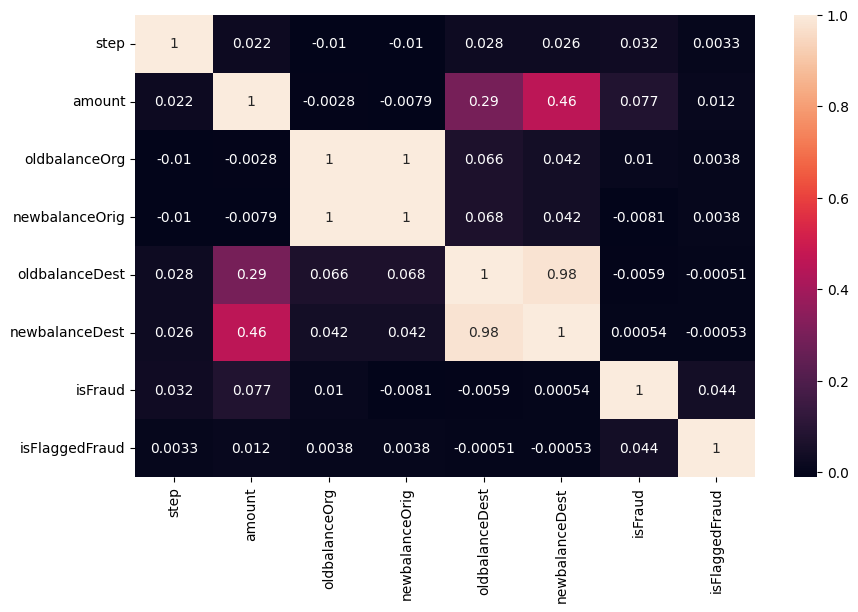

In [14]:
# Correlation heatmap
corr = df.drop(['type', 'nameOrig', 'nameDest'], axis=1).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)

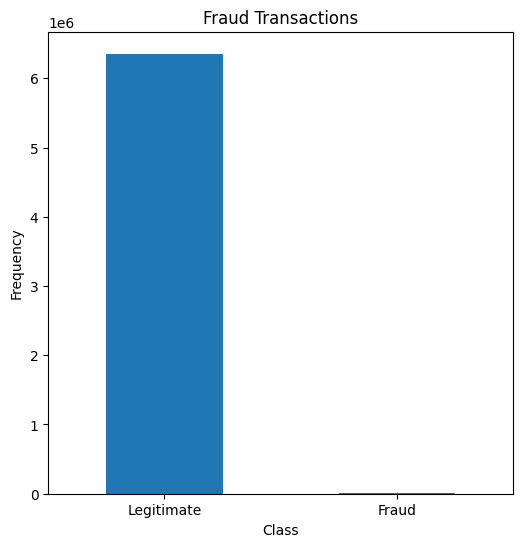

In [15]:
# Plot of legitimate and fraud transactions
plt.figure(figsize=(6, 6))
labels = ['Legitimate', 'Fraud']
count_classes = df.value_counts(df['isFraud'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title('Fraud Transactions')
plt.xticks(range(2), labels)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Create a copy of original data set to train and test models
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
# Attributes which are dtype: object

object_list = new_df.select_dtypes(include='object').columns
object_list

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [18]:
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in object_list:
    new_df[i] = le.fit_transform(new_df[i].astype(str))

print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


In [19]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


In [20]:
# MULTICOLINEARITY
# Import library for Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
  vif = pd.DataFrame()
  vif['variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  return vif

calc_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


oldbalanceOrg and newbalanceOrig, oldbalanceDest and newbalanceDest have too high VIF, showing that they are highly correlated. Similarly, nameDest with nameOrig.

In [21]:
# Combine these pairs of collinear attributes and drop the individual ones
new_df['actual_amount_orig'] = new_df.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'], axis=1)
new_df['actual_amount_dest'] = new_df.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'], axis=1)
new_df['transaction_path'] = new_df.apply(lambda x: x['nameOrig'] + x['nameDest'], axis=1)

new_df = new_df.drop(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'nameDest', 'nameOrig', 'step'], axis=1)

calc_vif(new_df)

,variables,VIF
0,type,2.687803
1,amount,3.818902
2,isFraud,1.184479
3,isFlaggedFraud,1.002546
4,actual_amount_orig,1.307910
5,actual_amount_dest,3.754335
6,transaction_path,2.677167


<Axes: >

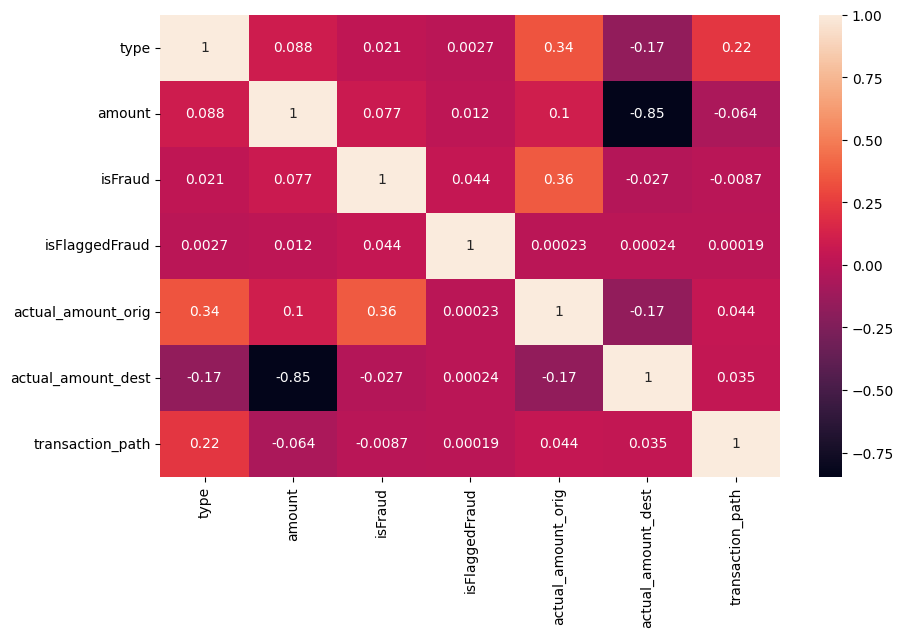

In [22]:
corr = new_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)

Using the VIF values and correlation heatmap we can select variables to be included in the model.
Check for highly correlated attributes, and drop the ones with less correlation.

In [33]:
# MODEL BUILDING
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import itertools
from collections import Counter

In [24]:
# Scale the data and normalize the amount
sc = StandardScaler()
new_df['NormalizedAmount'] = sc.fit_transform(new_df['amount'].values.reshape(-1, 1))
new_df.drop(['amount'], axis=1, inplace=True)

X = new_df.drop(['isFraud'], axis=1)
Y = new_df['isFraud']

Normalizing the whole data set may lead to decrease in accuracy of the model.

In [25]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((4453834, 6), (1908786, 6))

In [26]:
# DECISION TREE

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

Y_pred_dt = dt.predict(X_test)
dt_score = dt.score(X_test, Y_test) * 100

In [27]:
# RANDOM FOREST

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

Y_pred_rf = rf.predict(X_test)
rf_score = rf.score(X_test, Y_test) * 100

In [28]:
# EVALUATION
# Print scores of the two classifiers

print(f'Decision Tree Score: {dt_score}')
print(f'Random Forest Score: {rf_score}')

Decision Tree Score: 99.92293531071581
Random Forest Score: 99.95856004811435


In [29]:
# Key terms of Confusion Matrix - DT

print("TP, FP, TN, FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# Key terms of Confusion Matrix - RF

print("TP, FP, TN, FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP, FP, TN, FN - Decision Tree
True Positives: 1719
False Positives: 755
True Negatives: 1905596
False Negatives: 716
----------------------------------------------------------------------------------------
TP, FP, TN, FN - Random Forest
True Positives: 1712
False Positives: 68
True Negatives: 1906283
False Negatives: 723


TP:

Decision Tree ~ Random Forest --> Both are almost equal

FP:

Decision Tree >> Random Forest --> Random Forest looks better

TN:

Decision Tree < Random Forest --> Random Forest looks better

FN:

Decision Tree ~ Random Forest --> Both are almost equal

Thus, Random Forest is the better model here.

In [30]:
# Confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

print("----------------------------------------------------------------------------------------")

# Confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[1905596     755]
 [    716    1719]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1906283      68]
 [    723    1712]]


In [31]:
# Classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# Classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.69      0.71      0.70      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.85      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.70      0.81      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.85      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786



Random Forest looks better here too, with good precision and F1-score.

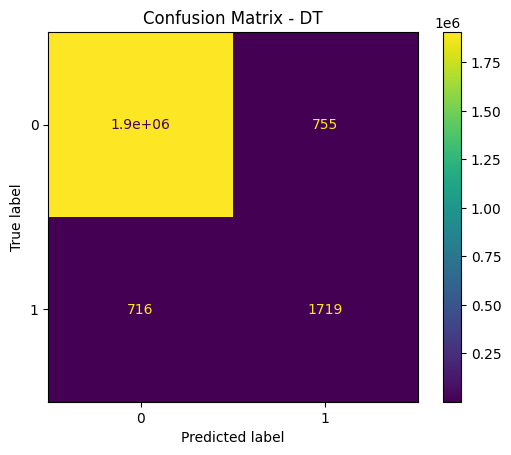

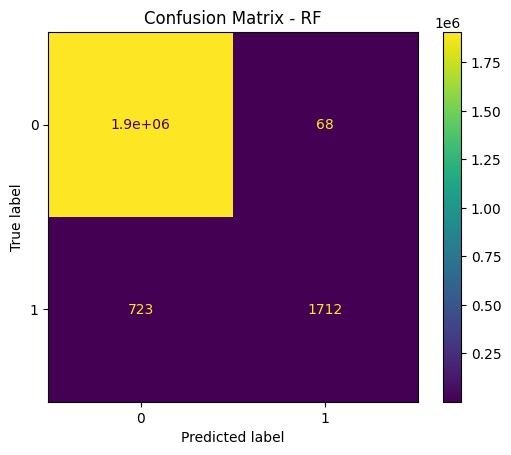

In [32]:
# Visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# Visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

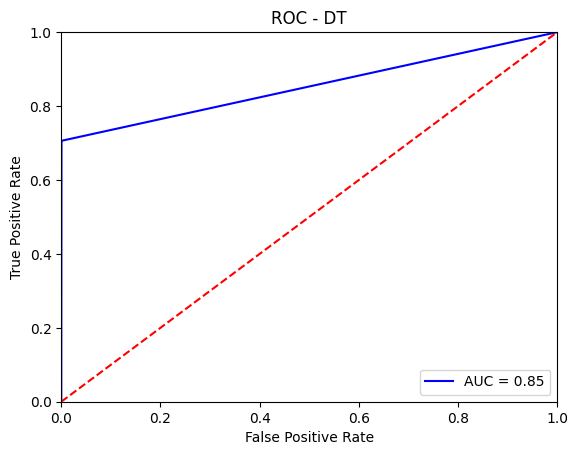

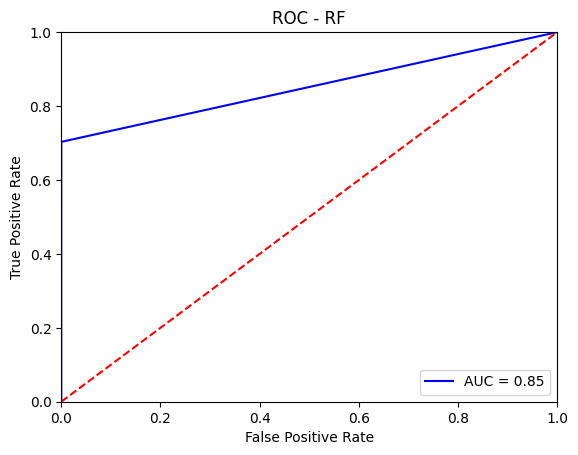

In [34]:
# AUC ROC - DT
# Calculate the FPR and TPR for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# Calculate the FPR and TPR for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC for both Decision Tree and Random Forest is equal. So both models are doing good at what they do.

What are the key factors that predict fraudulent customer?

1. Whether the source of request is secured or not.
2. Whether the name of organisation asking for money is legit or not.
3. Transaction history of the vendors.

What kind of prevention should be adopted while company update its infrastructure?

1. Usage of smart vertified payment apps only.
2. Browse through only secured websites.
3. Use secured internet connections only or use VPN.
4. Keep your mobile and laptop security updated.
5. Don't respond to unsolicited calls, SMS, or E-mails.
6. If you feel like you have been tricked or security compromised, contact your bank immediately.

Assuming these actions have been implemented, how would you determine if they work?

1. Bank sending E-statements or text messages.
2. Customers keeping track of their account activity and transaction history.